# ÖDEV-3
c02103

## Ön hazırlık dosyasında verilen kodlar:

### 2.1 Ayrık-zamanlı Fourier dönüşümü (DTFT)

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

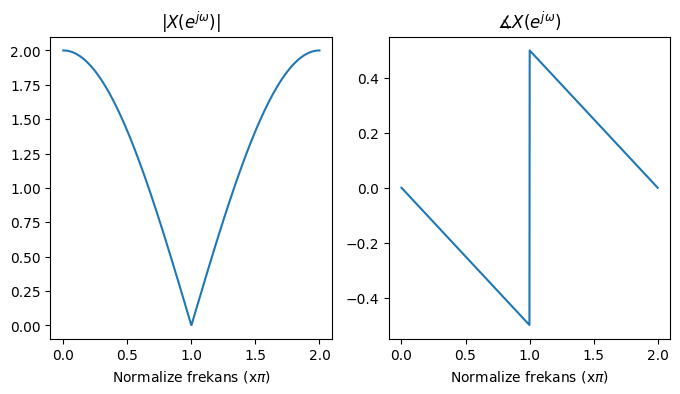

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline
# !!!bu iki satır grafiklerin okunurluğu için kendi eklediğim satırlar!!!
plt.rcParams['figure.figsize'] = [8, 4] 
plt.rcParams['figure.dpi'] = 100
# !!!bu iki satır grafiklerin okunurluğu için kendi eklediğim satırlar!!!

w_cont = np.linspace(0, 2*np.pi, 1000)
X_abs = np.abs(2*np.cos(w_cont/2))
X_phase = np.array([-w/2 if w<np.pi else -w/2+np.pi for w in w_cont])
plt.subplot(121)
plt.plot(w_cont/np.pi, X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')

plt.subplot(122)
plt.plot(w_cont/np.pi, X_phase/np.pi)
plt.title('$ \measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

### 2.2 Ayrık Fourier dönüşümü (DFT)

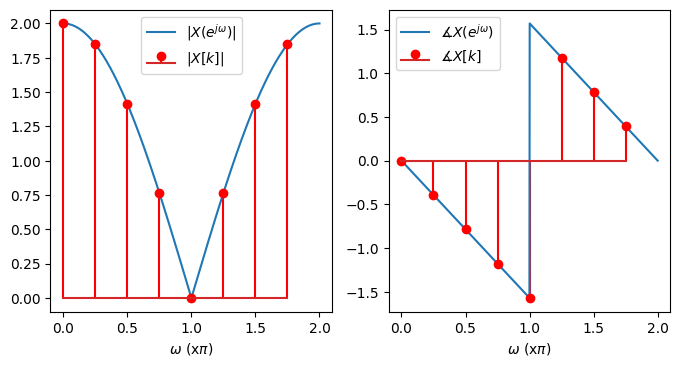

In [38]:
def dirac(n):
    if n==0:
        return 1
    else:
        return 0
N=8
X_k=np.zeros([N],dtype=complex)
for k in range(N):
    for n in range(N):
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)
X_k_abs=np.abs(X_k)
X_k_phase=np.angle(X_k)

plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,X_k_abs,'r-',label='$|X[k]|$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,X_k_phase,'r-',label='$ \measuredangle X[k]$',markerfmt='ro')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend()

### Hızlı Fourier Dönüşümü (FFT)

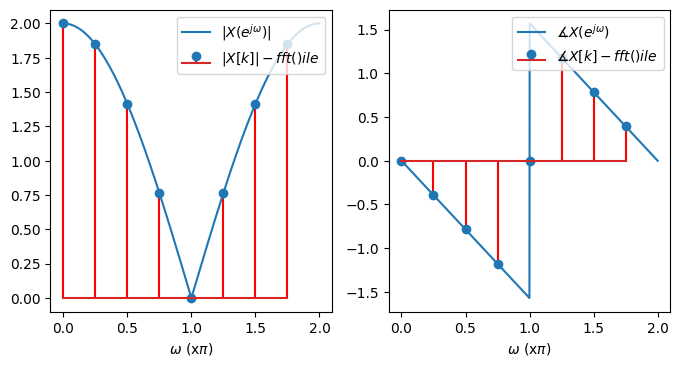

In [39]:
from scipy.fftpack import fft , ifft
x=np.array([1,1])
fft_X=fft(x,8)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)

## Grafik çizimi
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs,label='$|X(e^{j\omega})|$')
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase,label='$ \measuredangle X(e^{j\omega})$')
plt.stem(w_discrete/np.pi,phase_fft_X,'ro-',label='$ \measuredangle X[k]-fft() ile$')
plt.xlabel('$\omega$ (x$\pi$)')
plt.legend(loc='upper right')

### 2.2.1 Frekansta örnekleme → Zamanda periyodiklik ilişkisi

Text(0.5, 1.0, '$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

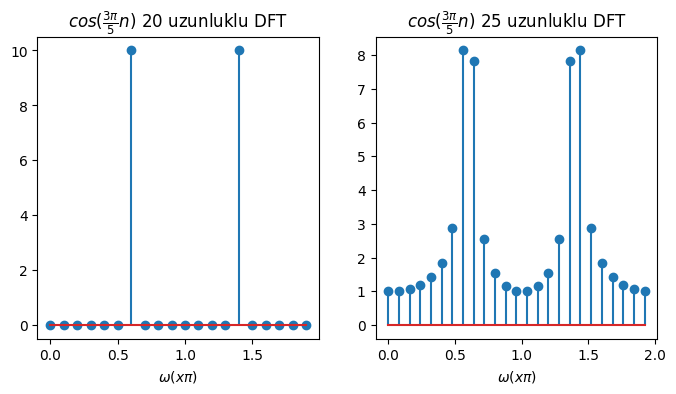

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft

# 20 uzunluklu versiyon
n1=np.arange(0,20)
x1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(x1))
w_disc_1=n1*2*np.pi/len(n1) # 0-2pi arası 2pi/20 adımlı vektör (2pi noktası dahil değil)
plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 20 uzunluklu DFT')

# 25 uzunluklu versiyon
n2=np.arange(0,25)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2) # 0-2pi arası 2pi/25 adımlı vektör (2pi noktası dahil değil)
plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

### 2.2.2 DFT genlik ve faz grafiklerinden işaret sentezi

Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times\\pi)=\\measuredangle a_k(\\times \\pi)$')

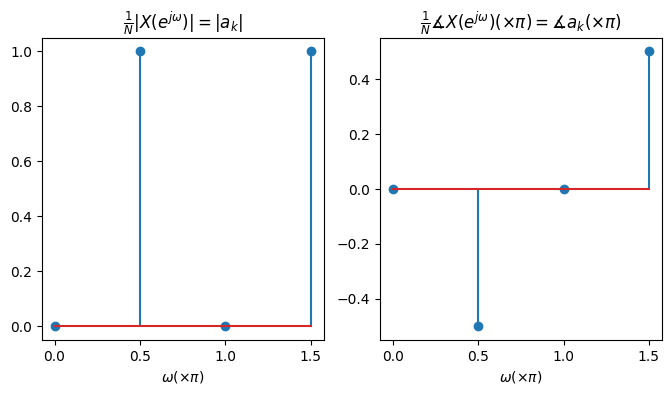

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft

x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/4 adımlı vektör
X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')

plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi)=\measuredangle a_k(\\times \pi)$')

## Ödev soruları:

### SORU-1
**a)** 
<div align="center">ℎ[𝑛] = 𝛿[𝑛] − 𝛿[𝑛 − 1]</div>

Bizden bu dürtü cevabının fourier dönüşümü istenmiştir. Fourier dönüşüm tabloları kullanılarak bu dönüşüm kolayca yapılıp sonuç aşağıdaki gibi bulunmuştur.

<div align="center">𝐻[exp(j𝜔)] = 1 − exp(-j𝜔)</div>


Text(0.5, 0, '$\\omega (\\times \\pi)$')

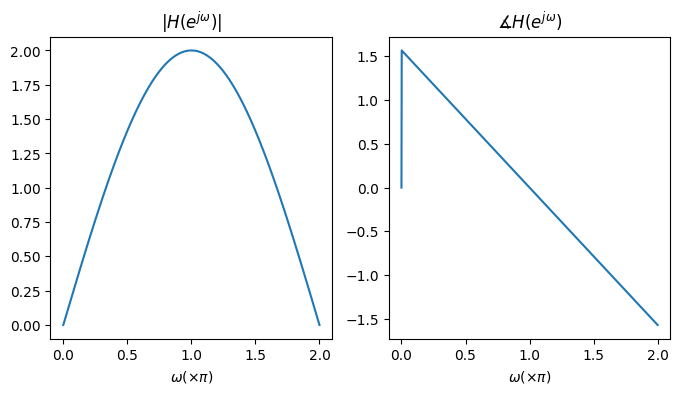

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from scipy.fftpack import fft , ifft
%matplotlib inline
# !!!grafiklerin okunurluğu için eklenen grafik büyütme satırları!!!
plt.rcParams['figure.figsize'] = [8, 4] 
plt.rcParams['figure.dpi'] = 100

w = np.linspace(0, 2*np.pi, 1000) #frekans sınırı 0 dan 2pi ye alınıyor, 1000 örnek şeklinde
H_a = 1 - np.exp(-1j*w) # a basamağında bulduğumuz formül

# genlik soldaki grafikte çizdiriliyor
plt.subplot(121)
plt.plot(w/np.pi, np.abs(H_a))
plt.title('$\|H(e^{j\omega})|$')
plt.xlabel('$\omega (\\times \pi)$')

# faz açısı sağdaki grafikte çizdiriliyor
plt.subplot(122)
plt.plot(w/np.pi, np.angle(H_a))
plt.title('$\measuredangle H(e^{j\omega})$')
plt.xlabel('$\omega (\\times \pi)$')

**b)** Ağırlıklı olarak orta frekans bantlarında geçirip sol ve sağ yanında geçirmediği için bu filtreye bant geçiren filtre diyebiliriz.

**c)**  

Text(0.5, 0, '$\\omega$ (x$\\pi$)')

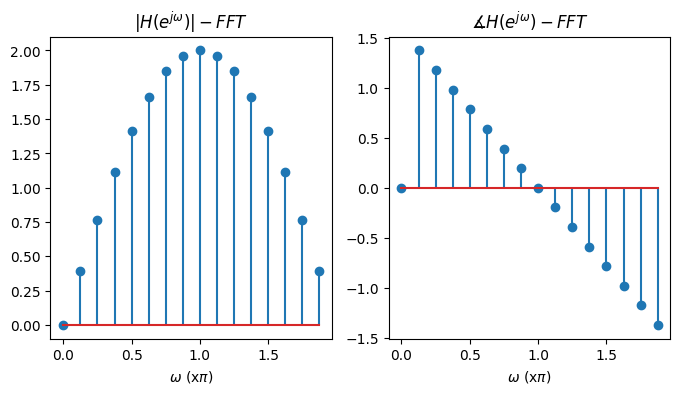

In [43]:
n = np.arange(0, 16, 1)
H_ = np.zeros(16)
H_[0] = 1
H_[1] = -1
w_disc = np.arange(0,len(n))*(2*np.pi/len(n))

# FFT yapılıyor
H_fft = fft(H_, 16)

plt.subplot(121)
plt.stem(w_disc/np.pi, np.abs(H_fft))
plt.title('$|H(e^{j\omega})| - FFT$')
plt.xlabel('$\omega$ (x$\pi$)')

plt.subplot(122)
plt.stem(w_disc/np.pi, np.angle(H_fft))
plt.title('$\measuredangle H(e^{j\omega}) - FFT$')
plt.xlabel('$\omega$ (x$\pi$)')

### SORU-2

Text(0.5, 0, '$\\omega$ (x$\\pi$)')

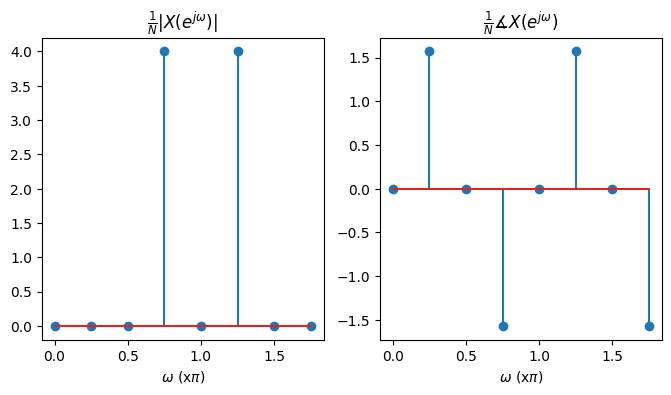

In [44]:
# verilen değerler x array ine yazıldı
x = np.array([0, 0.707106, -1, 0.707106, 0, -0.707106, 1, -0.707106])
w_disc = np.arange(0, len(x))*(2*np.pi/len(x)) # 0 ile 2pi arasında 2pi/n adımlı vektör 

n_fft = fft(x, len(x))

plt.subplot(121)
plt.stem(w_disc/np.pi, np.abs(n_fft))
plt.title('$\\frac{1}{N}|X(e^{j\omega})|$')
plt.xlabel('$\omega$ (x$\pi$)')

plt.subplot(122)
plt.stem(w_disc/np.pi, np.angle(n_fft))
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})$')
plt.xlabel('$\omega$ (x$\pi$)')


Bu grafiklerden ilk başta genlik grafiğine bakacak olursak, yanlızca 4. ve 6. indislerde sıfırdan farklı bir değere sahip olduğunu görürüz, ön hazırlıka verilen DFS sentez denklemini kullanırız.  

`a3*exp(j*0.75*pi*n) + a5*exp(j*1.25*pi*n)` üstel sayılarının toplamından `x[n]` sentezlenebilir. Fakat ilk başta katsayıların buluması gerekmektedir. 

<div align="center">a3 = |a3|*exp(j∠a3) = 0.5*exp(-j*pi*1.57)</div>

buradaki `|a3|` genlikteki 4. indisin değeri, `∠a3` değerini de faz grafiğinden okuruz ama okuma rahatlığı için vektör pi ye bölündüğünden dik eksendeki değeri alırken pi ile çarpıp alıyoruz.

<div align="center">a5 = |a5|*exp(j∠a) = 0.5*exp(j*pi*1.57)</div>

DFS formülünde her şey yerine konup işlemler yapılınca  

<div align="center">x[n] = 1/2 (exp(-1.57 * 1j * pi + 0.75 * 1j * n * pi ) + exp(1.57 * 1j * pi + 1.25 * 1j * n * pi))</div>

şeklinde bir denklem çıkıyor, gerekli sadeleştirilmeler yapılınca, 
<div align="center">x[n] = (1) * cos((0.75) * pi * n - (1.57 * pi))</div>

buradan da `A = 1, w0 = 0.75*pi, theta = (-1.57)*pi` değerlerini görebiliyoruz

### SORU-3

|H(e^{j\omega})|:  0.9999999999999999
angle H(e^{j\omega}): $ 1.0471975511965979


Text(0.5, 0, 'n')

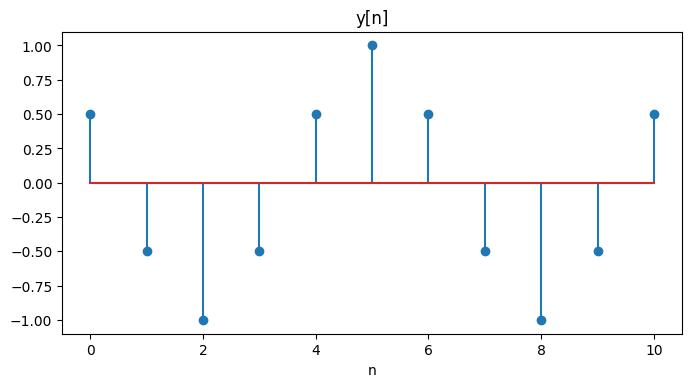

In [45]:
w = np.pi / 3
H_a = 1 - np.exp(-1j*w)

n = np.arange(0, 11, 1)

# soruda istendiği gibi sonrasında kullanacağımız için H nin genlik ve faz açıları
print('|H(e^{j\omega})|: ', np.abs(H_a))
print('angle H(e^{j\omega}): $', np.angle(H_a))

# ön hazırlıkta verilen formülde her şey yerine koyuluyor
y = np.abs(H_a)*np.cos(w*n + np.angle(H_a))

plt.figure()
plt.stem(n, y)
plt.title('y[n]')
plt.xlabel('n')